<a href="https://colab.research.google.com/github/abhinavsingh-github/airbnb-booking-analysis/blob/main/Abhinav_Singh_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

***Airbnb is an online space where person rent their unused rooms or entire house. Irrespective owning any of the property, Airbnb acts as a broker, receiving margin from each booking. Since 2008 Airbnb is growing at fast paced, and now it has over 7 million accommodations in more than 191 countries and regions globally.***

***Now we are going to experiment and understand relationship between different factors in New York City.***




In [1]:
# Importing useful libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive below
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Airbnb NYC dataset
file_path = '/content/drive/MyDrive/Data Science/Capstone Project 1/Airbnb_NYC_2019.csv'
dataset = pd.read_csv(file_path)

In [4]:
# Checking basic info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Viewing head of the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Lets create copy of current dataset and now we will work on copied data
airbnb = dataset.copy()

In [7]:
# Finding null values in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**By Checking above, got to know that we have max no. of nulls in last_review and reviews_per_month.**

**After seeing initial data, last_review column is something related to datetype and have more nulls , so I think we can drop this column for further analysis.**

In [8]:
# Dropped last_review column
airbnb.drop('last_review', axis=1, inplace=True)

For rest null values in dataset, we are replacing it by 0 for now.

In [9]:
# Replacing null values by 0 in name, host_name, reviews_per_month
airbnb['name'].fillna(value=0, inplace=True)
airbnb['host_name'].fillna(value=0, inplace=True)
airbnb['reviews_per_month'].fillna(value=0, inplace=True)

In [10]:
# Checking if still any value present in dataset
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now, we can clearly that there is no null values in dataset now. Now, we can proceed with experiments.**

In [11]:
# Checking unique values over each columns
airbnb.nunique()

id                                48895
name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Finding Top 10 hosts those are holding largest quantity of listings.**

In [13]:
# Finding top 10 host_id with most quantity of listings
top10_hosts = pd.DataFrame(airbnb.host_id.value_counts()).iloc[:10]
top10_hosts.columns=['count']
top10_hosts['host_id'] = top10_hosts.index
top10_hosts.reset_index(drop=True, inplace=True)
print(top10_hosts)

   count    host_id
0    327  219517861
1    232  107434423
2    121   30283594
3    103  137358866
4     96   12243051
5     96   16098958
6     91   61391963
7     87   22541573
8     65  200380610
9     52    7503643


Text(0.5, 0, 'Host Id')

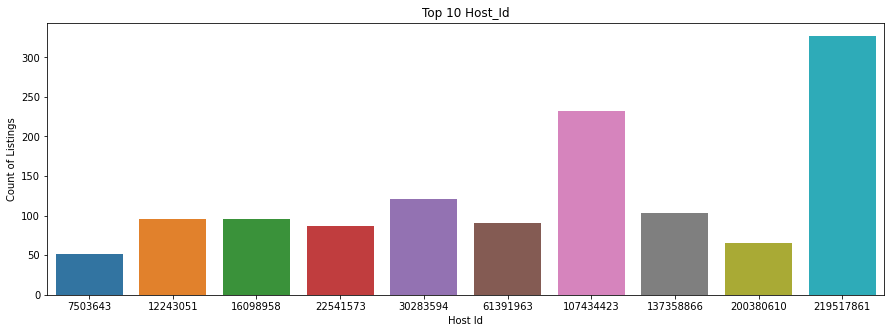

In [18]:
# Plotting graph
plt.figure(figsize=(15,5))
sns.barplot(x="host_id", y="count", data=top10_hosts)

plt.title('Top 10 Host_Id')
plt.ylabel('Count of Listings')
plt.xlabel('Host Id')

From above graph, we can clearly see host_id **219517861** have maximum no. of listings **327**.

**Room Type Analysis: As per unique values, we know that we have 3 three types of room type in dataset.**

In [17]:
# Lets find frequency count of each room_type
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

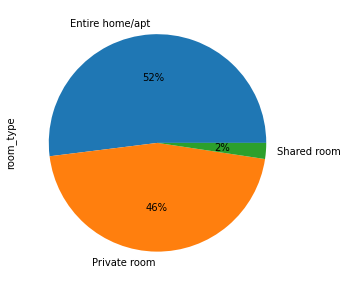

In [26]:
# Plotting pie chart
roomtypefre = airbnb['room_type'].value_counts()
roomtypefre.plot(kind="pie", figsize=(5, 5) , autopct='%1.0f%%')

By above, in our dataset approx **25k customer(52%) choose to use a entire home/apt** whereas **22k customer(46%) choose a private room**, only **1k customer(2%) customer choose a shared room**. By this, we can conclude that mostly customer using airbnb used with family.

**Neighbourhood Group Analysis: As per unique values, we know that we have 5 groups in dataset.**

In [27]:
# Lets find frequency count of each neighbourhood_group
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

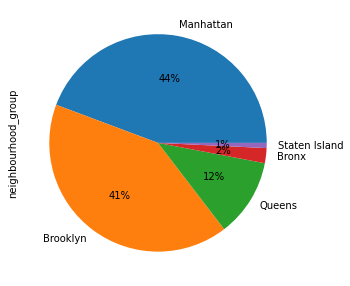

In [28]:
# Plotting pie chart
neigroupfre = airbnb['neighbourhood_group'].value_counts()
neigroupfre.plot(kind="pie", figsize=(5, 5) , autopct='%1.0f%%')

By seeing above chart, **Mahattan(44%)** is place where ***most*** of airbnb transcations happenend, whereas **Staten Island(1%)** is place where ***least*** airbnb transcations happenend. This conclude that customer are most likely to live in Mahattan.